In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_make import *
from solver import *
import solver
from plot_make import *
import importlib
importlib.reload(solver)




## Data making
x_len, y_len = 201, 201
images, xx, yy = image_make(x_len, y_len, (-1,1),(-1,1), gaussian_function, (0.03,0.03, 0,0))

## Obs making
obs_num = 100
vis_obs = obs_make(images, obs_num, 10, sn = 5)


## Images from obs
#vis_obs_shift = np.fft.ifftshift(vis_obs)
ifft_obs = np.fft.ifft2(vis_obs)

## Comaparison of images
width_im = 20
sum_flux_obs = np.sum(ifft_obs.real[int(x_len/2) - width_im:int(x_len/2) + width_im, int(y_len/2) - width_im:int(y_len/2) + width_im])
sum_flux_ans = np.sum(images.real[int(x_len/2) - width_im:int(x_len/2) + width_im, int(y_len/2) - width_im:int(y_len/2) + width_im])
normalization = np.abs(sum_flux_ans/sum_flux_obs)

## Setting priors for model
model_prior = ifft_obs.real
l2_lambda = 1e3
c1 = 1e-4
rho = 0.80
eps_stop = 1e-10
iter_max =50
loss_name = "tsv"

model_prior2 = ifft_obs.real

##
gradient, test = grad_loss_arr_l2(model_prior, vis_obs, model_prior ,l2_lambda)
alpha = 1000 *(np.max(model_prior)/np.min(np.abs(gradient)))
print(gradient[0][0])
grad_num, grad_l2_num = grad_loss_numerical_l2(model_prior,0,0,vis_obs, model_prior ,l2_lambda)
print(grad_num, gradient[0][0], grad_num/gradient[0][0])
plt.imshow(images)

-0.5357218544108037
-21643.733978271484 -0.5357218544108037 40401.065963746514


In [2]:
import solver

importlib.reload(solver)

model_map2 = only_fx_mfista(images, loss_function_TSV, grad_loss_tsv, zero_func, 1.1, 1, 1000, vis_obs, model_prior, l2_lambda)

iternum: 50 , L: 76619.06513870326 F_zk: 8.902233199427764
iternum: 100 , L: 76619.06513870326 F_zk: 8.837526164798565
iternum: 150 , L: 76619.06513870326 F_zk: 8.797162009307922
iternum: 200 , L: 76619.06513870326 F_zk: 8.770966547429797
iternum: 250 , L: 76619.06513870326 F_zk: 8.753328254972953
iternum: 300 , L: 76619.06513870326 F_zk: 8.741047262944491
iternum: 350 , L: 76619.06513870326 F_zk: 8.732235392199502
iternum: 400 , L: 76619.06513870326 F_zk: 8.725740778340091
iternum: 450 , L: 76619.06513870326 F_zk: 8.72083838070085
iternum: 500 , L: 76619.06513870326 F_zk: 8.717058393875304
iternum: 550 , L: 76619.06513870326 F_zk: 8.71408818063741
iternum: 600 , L: 76619.06513870326 F_zk: 8.71171455909531
iternum: 650 , L: 76619.06513870326 F_zk: 8.709788887711799
iternum: 700 , L: 76619.06513870326 F_zk: 8.708205391430733
iternum: 750 , L: 76619.06513870326 F_zk: 8.706887381827995
iternum: 800 , L: 76619.06513870326 F_zk: 8.705778299882997
iternum: 850 , L: 76619.06513870326 F_zk: 8.

In [3]:
import solver
importlib.reload(solver)

l2_lambda = 0
l1_lambda = 1e1
model_map3 = fx_L1_mfista(images, loss_function_TSV, grad_loss_tsv, L1_norm, 1.05, 1, 700, vis_obs, l1_lambda, l2_lambda)

20653 9 19739 0.00020757015304868407
iternum: 50 , L: 41616.65758992186 F_zk: 8.610540058175781
20582 188 19631 0.0002523028183441321
iternum: 100 , L: 41616.65758992186 F_zk: 8.610538358499898
20489 401 19511 0.0002523028183441321
iternum: 150 , L: 39634.91199040177 F_zk: 8.610536701327016
20383 593 19425 0.0002523028183441321
iternum: 200 , L: 43697.49046941796 F_zk: 8.61053505848398
20279 778 19344 0.00024028839842298293
iternum: 250 , L: 37747.53522895407 F_zk: 8.610533448649814
20181 958 19262 0.00024028839842298293
iternum: 300 , L: 39634.91199040177 F_zk: 8.610531852699358
20091 1141 19169 0.0002649179592613387
iternum: 350 , L: 37747.53522895407 F_zk: 8.61053027401609
19979 1345 19077 0.0002523028183441321
iternum: 400 , L: 39634.91199040177 F_zk: 8.610528726040721
19876 1547 18978 0.0002649179592613387
iternum: 450 , L: 41616.65758992186 F_zk: 8.61052719765338
19787 1730 18884 0.0002523028183441321
iternum: 500 , L: 37747.53522895407 F_zk: 8.610525696199288
19686 1922 18793 0.

In [65]:
print(len(model_map3[model_map3==0]))

3184


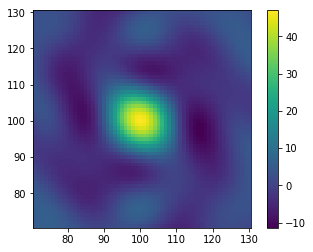

In [4]:
nx ,ny = np.shape(model_map2)
fig = plt.figure()
ax = fig.add_subplot(111)
im  = ax.imshow(model_prior)
wd = 30
plt.xlim(nx/2 - wd,  nx/2 + wd)
plt.ylim(ny/2 - wd,  ny/2 + wd)
fig.colorbar(im)
l2_lambda = 1e3
#print(np.max(model_map2), np.max(model_map3), np.sum(model_map2), np.sum(model_map3))

121.44900306968796 443.13948606362567 25066.282746309986 24905.680679167814


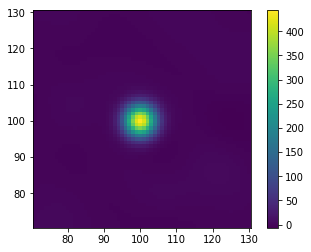

In [5]:
nx ,ny = np.shape(model_map3)
fig = plt.figure()
ax = fig.add_subplot(111)
im  = ax.imshow(model_map3)
wd = 30
plt.xlim(nx/2 - wd,  nx/2 + wd)
plt.ylim(ny/2 - wd,  ny/2 + wd)
fig.colorbar(im)
l2_lambda = 1e3

print(np.max(model_map2), np.max(model_map3), np.sum(model_map2), np.sum(model_map3))

In [6]:
wd = 30
print(np.sum(model_map3[int(nx/2 - wd):int(nx/2 + wd), int(nx/2 - wd):int(nx/2 + wd)]))
print(np.sum(images[int(nx/2 - wd):int(nx/2 + wd), int(nx/2 - wd):int(nx/2 + wd)]))

25212.010019589783
25066.282746309982


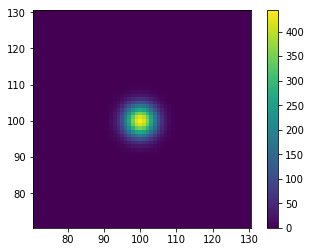

In [45]:
nx ,ny = np.shape(model_map3)
fig = plt.figure()
ax = fig.add_subplot(111)
im  = ax.imshow(images)
wd = 30
plt.xlim(nx/2 - wd,  nx/2 + wd)
plt.ylim(ny/2 - wd,  ny/2 + wd)
fig.colorbar(im)